
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of investments options from the dow30 and alabama.  Construct portfolios from the Investment Options in the dow30+alabama and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['dow30-galaxy', 'alabama-galaxy']
risk_free_rate = 0
annual_returns = '5 Yr'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M,US Stocks:Industrials,618.87,96.28,96.70,7.14,6.12,22.03,9.59,32.48,6.12,0.19
1,AXP,American Express,US Stocks:Financials,125.67,91.67,57.22,23.49,20.73,23.10,12.28,27.16,20.73,0.76
2,AMGN,Amgen,US Stocks:Healthcare,216.36,-31.29,-6.54,12.14,8.14,18.38,6.56,24.98,8.14,0.33
3,AMZN,Amazon,US Stocks:Consumer Discretionary,135.58,140.65,49.48,19.62,20.73,21.45,10.13,34.53,20.73,0.60
4,AAPL,Apple,US Stocks:Technology,-54.92,4.51,26.12,14.52,25.11,29.77,18.97,26.23,25.11,0.96
5,BA,Boeing,US Stocks:Industrials,-0.20,77.27,-11.93,-3.14,-10.92,26.63,14.02,40.93,-10.92,-446.96
6,CAT,Caterpillar,US Stocks:Industrials,37.63,-14.34,23.72,22.48,24.75,32.45,20.01,36.33,24.75,0.68
7,CVX,Chevron,US Stocks:Energy,65.31,6.04,3.66,8.09,10.89,23.08,16.78,28.30,10.89,0.38
8,CSCO,Cisco,US Stocks:Technology,43.91,44.18,19.66,6.36,8.18,21.09,17.49,20.94,8.18,0.39
9,KO,Coca-Cola,US Stocks:Consumer Staples,31.95,-9.40,9.21,5.25,5.39,19.70,9.95,14.14,5.39,0.38


In [6]:
# rank
rank = bb.rank(df, rank_by='Sharpe Ratio')
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
21,NVDA,Nvidia,US Stocks:Technology,-80.32,-47.77,91.33,74.15,81.04,83.09,61.05,54.85,81.04,1.48
29,WMT,Walmart,US Stocks:Consumer Discretionary,162.67,110.23,79.97,31.30,22.18,14.93,6.33,20.28,22.18,1.09
30,ROAD,Construction Partners Inc,US Stocks:Industrials,-71.93,1.61,78.95,47.00,36.35,55.81,42.57,36.50,36.35,1.00
19,MSFT,Microsoft,US Stocks:Technology,-24.36,-14.06,2.34,12.80,21.27,32.63,21.88,21.68,21.27,0.98
4,AAPL,Apple,US Stocks:Technology,-54.92,4.51,26.12,14.52,25.11,29.77,18.97,26.23,25.11,0.96
11,GS,Goldman Sachs,US Stocks:Financials,275.46,127.06,69.54,26.55,24.44,27.06,12.07,28.34,24.44,0.86
14,IBM,IBM,US Stocks:Technology,499.48,124.97,41.02,29.55,19.32,46.24,6.88,24.07,19.32,0.80
26,UNH,UnitedHealth Group,US Stocks:Healthcare,121.00,-11.92,9.41,7.31,15.35,31.36,20.79,19.17,15.35,0.80
1,AXP,American Express,US Stocks:Financials,125.67,91.67,57.22,23.49,20.73,23.10,12.28,27.16,20.73,0.76
25,TRV,Travelers,US Stocks:Financials,30.05,-3.90,16.91,15.83,15.32,26.94,16.59,21.38,15.32,0.72


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])[:20]
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Top10 Portfolio'
}
top10 = list(rank['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()
portfolio_option

{'Title': 'Ranked Portfolio',
 'NVDA': 0.05,
 'WMT': 0.05,
 'ROAD': 0.05,
 'MSFT': 0.05,
 'AAPL': 0.05,
 'GS': 0.05,
 'IBM': 0.05,
 'UNH': 0.05,
 'AXP': 0.05,
 'TRV': 0.05,
 'CAT': 0.05,
 'JPM': 0.05,
 'HD': 0.05,
 'AMZN': 0.05,
 'V': 0.05,
 'VMC': 0.05,
 'MCD': 0.05,
 'PG': 0.05,
 'SHW': 0.05,
 'RF': 0.05}

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'Sharpe Ratio'},
    'Investment Option': {'weight_by': 'Equal'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,NVDA,WMT,ROAD,MSFT,AAPL,GS,IBM,UNH,AXP,TRV,...,JPM,HD,AMZN,V,VMC,MCD,PG,SHW,RF,Ranked Portfolio
Annual Returns,81.04,22.18,36.35,21.27,25.11,24.44,19.32,15.35,20.73,15.32,...,18.07,14.72,20.73,11.79,15.18,9.03,8.31,13.70,14.24,21.64
Std Dev,54.85,20.28,36.50,21.68,26.23,28.34,24.07,19.17,27.16,21.38,...,27.12,24.23,34.53,19.97,26.78,17.85,17.86,30.78,32.54,20.71
Sharpe Ratio,1.48,1.09,1.00,0.98,0.96,0.86,0.80,0.80,0.76,0.72,...,0.67,0.61,0.60,0.59,0.57,0.51,0.47,0.45,0.44,1.04
Weight,0.05,0.04,0.07,0.05,0.05,0.02,0.05,0.15,0.02,0.02,...,0.02,0.04,0.04,0.02,0.06,0.06,0.06,0.06,0.02,1.00
Worst Typical Down Year,-28.66,-18.38,-36.65,-22.09,-27.35,-32.24,-28.82,-22.99,-33.59,-27.44,...,-36.17,-33.74,-48.33,-28.15,-38.38,-26.67,-27.41,-47.86,-50.84,-19.78
Black Swan,-83.51,-38.66,-73.15,-43.77,-53.58,-60.58,-52.89,-42.16,-60.75,-48.82,...,-63.29,-57.97,-82.86,-48.12,-65.16,-44.52,-45.27,-78.64,-83.38,-40.49


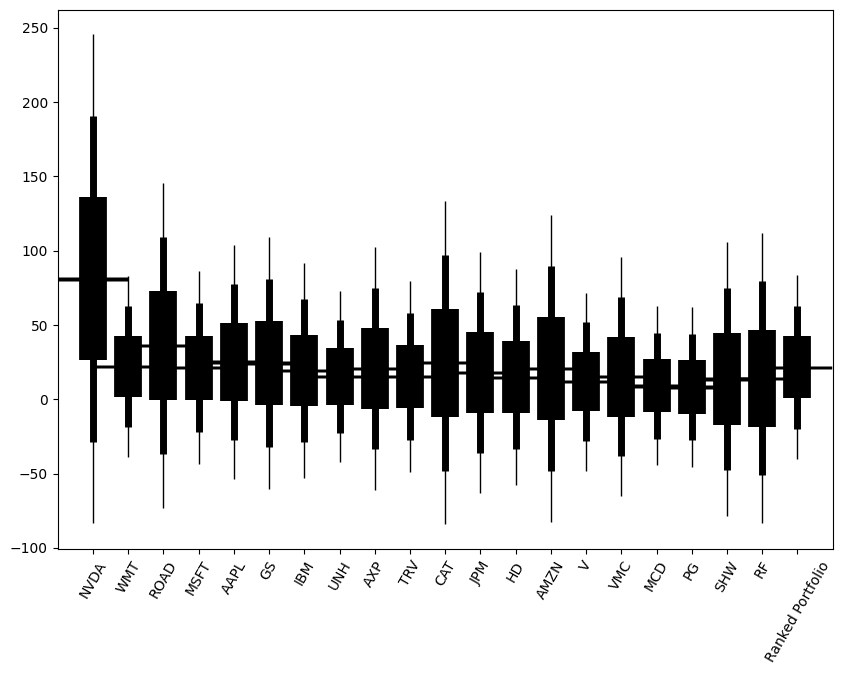

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

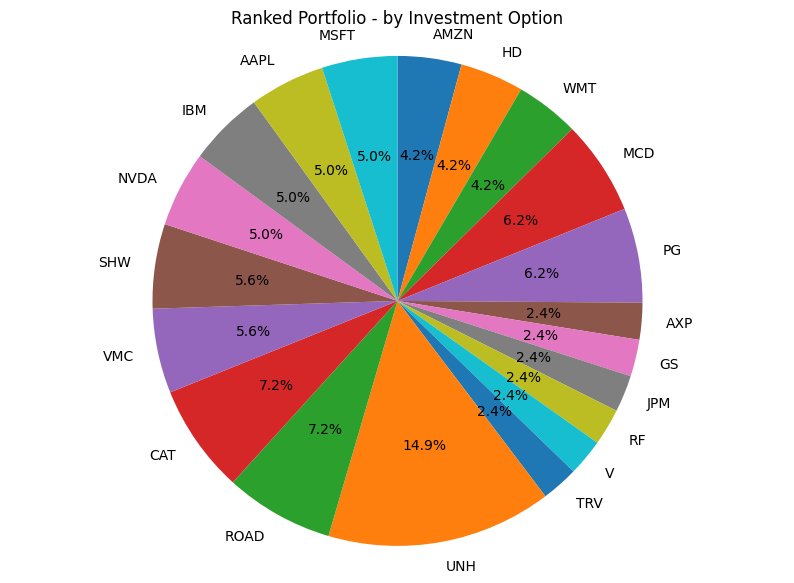

AMZN   0.04
HD     0.04
WMT    0.04
MCD    0.06
PG     0.06
AXP    0.02
GS     0.02
JPM    0.02
RF     0.02
V      0.02
TRV    0.02
UNH    0.15
ROAD   0.07
CAT    0.07
VMC    0.06
SHW    0.06
NVDA   0.05
IBM    0.05
AAPL   0.05
MSFT   0.05



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    NVDA                           0.0498
    WMT                            0.0421
    ROAD                           0.0718
    MSFT                           0.0498
    AAPL                           0.0498
    GS                             0.0243
    IBM                            0.0498
    UNH                            0.1486
    AXP                            0.0243
    TRV                            0.0243
    CAT                            0.0718
    JPM                            0.0243
    HD                             0.0421
    AMZN                           0.0421
    V                              0.0243
    VMC                            0.0558
    MCD                            0.0624
    PG                             0.0624
    SHW                            0.0558
    RF                             0.0243


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': -20
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer...........

Ranked Portfolio Metrics:           
    max_sharpe_ratio            1.30
    annual_return              29.24
    std_dev                    22.46
    worst typical down year   -15.69
    black_swan                -38.15


Ranked Portfolio Weights:
    NVDA                           0.1700
    WMT                            0.1600
    ROAD                           0.0700
    MSFT                           0.0000
    AAPL                           0.0000
    GS                             0.0500
    IBM                            0.0400
    UNH                            0.0300
    AXP                            0.0000
    TRV                            0.0700
    CAT                            0.1300
    JPM                            0.0000
    HD                             0.0000
    AMZN                           0.0000
    V                              0.0000
    VMC                            0.0000
    MCD                            0.1600
    PG

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).